References:

https://www.tensorflow.org/tutorials/keras/classification

https://www.kaggle.com/code/saumandas/intro-to-transfer-learning-with-mnist

https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [5]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split

In [7]:
#loading fashion mnist dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


#splitting train set into train and validation using an 80-20 split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
#change pixel values to 0-1
X_train = X_train / 255
X_val = X_val / 255
test_images = test_images / 255

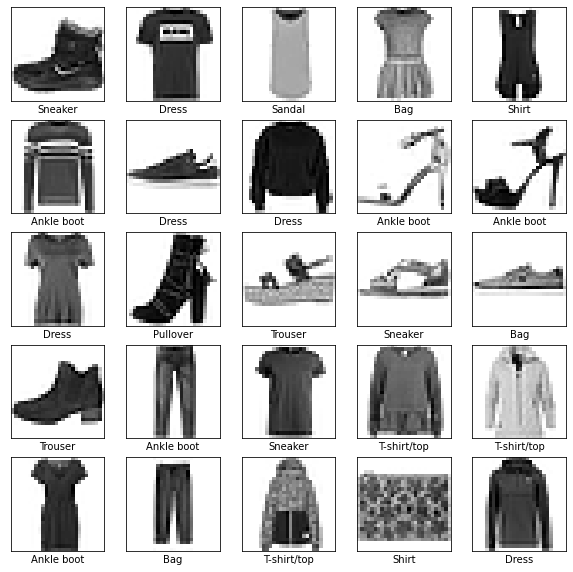

In [12]:
#matplotlib visualization
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [63]:
#sequential neural network keras model using 2 hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [64]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [65]:
#Uses Adam optimization function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5283 - accuracy: 0.8123 - val_loss: 0.4274 - val_accuracy: 0.8476
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3880 - accuracy: 0.8587 - val_loss: 0.3805 - val_accuracy: 0.8619
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3489 - accuracy: 0.8719 - val_loss: 0.3571 - val_accuracy: 0.8717
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3230 - accuracy: 0.8795 - val_loss: 0.3229 - val_accuracy: 0.8842
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3045 - accuracy: 0.8877 - val_loss: 0.3428 - val_accuracy: 0.8767
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2908 - accuracy: 0.8912 - val_loss: 0.3294 - val_accuracy: 0.8859
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2818 - accuracy: 0.8945 - val_loss: 0.3252 - val_accuracy:

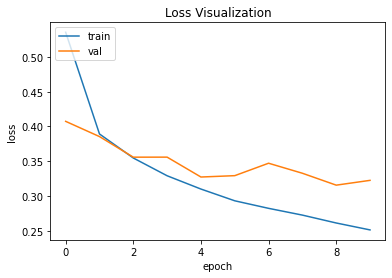

In [55]:
#Loss visualization 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Visualization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

print(test_images.shape)

313/313 - 1s - loss: 0.3490 - accuracy: 0.8820 - 625ms/epoch - 2ms/step

Test accuracy: 0.8820000290870667
(10000, 28, 28)


In [67]:
#converting values to probability per class
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)
print(test_images.shape)


313/313 [==============================] - 1s 2ms/step
(10000, 28, 28)


In [25]:
#example from training set
class_names[predictions[0].argmax()]

'Ankle boot'

In [26]:
#image at index i + prediction probability
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#bar graph showing various model predictions for different classes for a given image
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

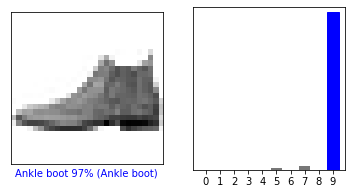

In [27]:
#example of correct prediction
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

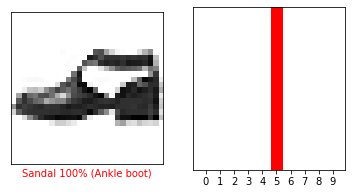

In [28]:
#example of incorrect prediction
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [29]:
pred_labels = np.array([])
for i in range(len(predictions)):
  pred_labels = np.append(pred_labels, [int(predictions[i].argmax())])

In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, pred_labels)

In [69]:
print(type(cm))

<class 'numpy.ndarray'>


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap="Oranges", normalize=False):

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    

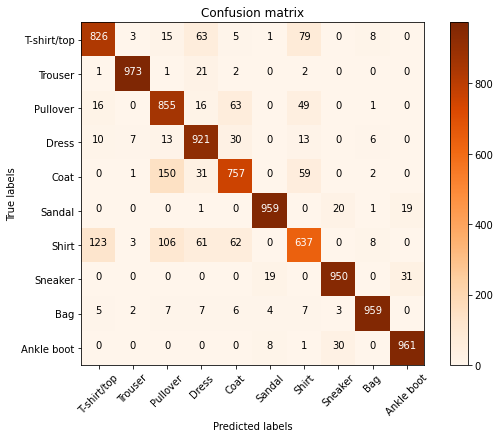

In [71]:
plot_confusion_matrix(cm, class_names)

In [72]:
from google.colab import files
from PIL import Image, ImageOps
from numpy import asarray
import cv2

In [77]:
uploaded = files.upload()

Saving bag.png to bag (1).png
Saving shirt.png to shirt (1).png
Saving shoe.png to shoe (1).png


In [78]:
user_images = np.empty([0, 2])
user_predictions = np.zeros([len(uploaded), 10])

for imgName in uploaded:
  img = Image.open(imgName)
  img = ImageOps.grayscale(img)
  img28x28 = img.resize((28, 28))

  imgPix28x28 = img28x28.resize(img.size, Image.NEAREST)

  imgPix28x28 = imgPix28x28.resize((28, 28))
  imgPixArr28x28 = np.asarray(imgPix28x28)

  imgPixArr28x28 = imgPixArr28x28.astype(float) / 255
  imgPixArr1x28x28 = (np.expand_dims(imgPixArr28x28, 0))

  prob = probability_model.predict(imgPixArr1x28x28)
  
  print(f"Image: {imgName}\t|\tPrediction: {class_names[prob.argmax()]}")

  

1/1 [==============================] - 0s 18ms/step
Image: bag.png	|	Prediction: Bag
1/1 [==============================] - 0s 20ms/step
Image: shirt.png	|	Prediction: Pullover
1/1 [==============================] - 0s 16ms/step
Image: shoe.png	|	Prediction: Sneaker
